# Evaluating Model Using Vector Similarity Scores

We evaluate models using the sentence embedding module of the metric. Gemma2 receives the highest scores while Phi has the lowest.

### Imports

In [3]:
import sys
import pandas as pd
sys.path.append("..")
import seaborn as sns
import nltk
import matplotlib.pyplot as plt

from humor.vector_similarity_metric import vector_similarity_metric

In [4]:
ground_truth = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_data.csv')
gemma = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma_answers.csv')
phi_model = pd.read_csv("/home/ada/humor/data/stand_up_dataset/phi3_mini_quotes.csv")
gemma2 = pd.read_csv("/home/ada/humor/data/stand_up_dataset/gemma2_2 - gemma2 - gemma2.csv")
llama = pd.read_csv("/home/ada/humor/data/stand_up_dataset/llama - llama.csv")
chatgpt = pd.read_csv("/home/ada/humor/data/stand_up_dataset/Chat_GPT_results - Sheet1.csv")
claude = pd.read_csv("/home/ada/humor/data/stand_up_dataset/Claude_results - Sheet1.csv")

### Experiment

In [5]:
gemma_metric = vector_similarity_metric(gemma, ground_truth)
print("Gemma Model:", gemma_metric.select_dtypes(include='number').mean())

phi_metric = vector_similarity_metric(phi_model, ground_truth)
print("Phi Model:", phi_metric.select_dtypes(include='number').mean())

gemma2_metric = vector_similarity_metric(gemma2, ground_truth)
print("Gemma2 Model:", gemma2_metric.select_dtypes(include='number').mean())

llama_metric = vector_similarity_metric(llama, ground_truth)
print("Llama Model:",llama_metric.select_dtypes(include='number').mean())

chat_metric = vector_similarity_metric(chatgpt, ground_truth)
print("ChatGPT Model:", chat_metric.select_dtypes(include='number').mean())

claude_metric = vector_similarity_metric(claude, ground_truth)
print("Claude Model:",claude_metric.select_dtypes(include='number').mean())

Gemma Model: score    30.00032
dtype: float64
Phi Model: score    25.762219
dtype: float64
Gemma2 Model: score    28.505246
dtype: float64
Llama Model: score    33.846099
dtype: float64
ChatGPT Model: score    25.371468
dtype: float64
Claude Model: score    46.869064
dtype: float64


<Figure size 500x500 with 0 Axes>

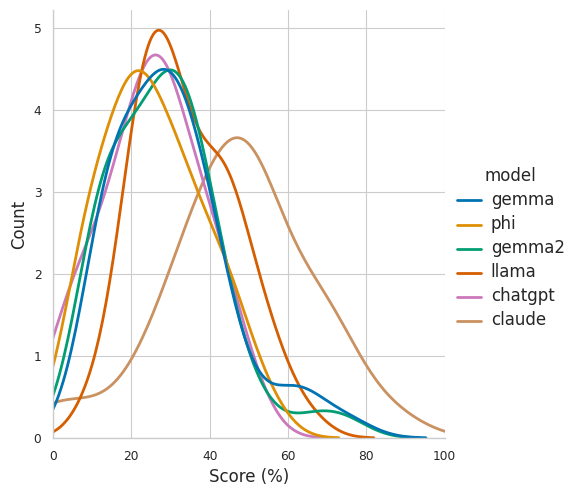

In [6]:
import matplotlib.ticker as mtick

gemma = gemma_metric.assign(model="gemma")
phi = phi_metric.assign(model="phi")
gemma2 = gemma2_metric.assign(model = "gemma2")
llama = llama_metric.assign(model = "llama")
chatgpt = chat_metric.assign(model = "chatgpt")
claude = claude_metric.assign(model = "claude")

sns.set_style("whitegrid")
sns.set_context("paper")
plt.figure(figsize=(5, 5))  
sns.set_palette("colorblind")

df = pd.concat([gemma, phi, gemma2, llama, chatgpt, claude]).reset_index(drop=True)

plot = sns.displot(
    df, x="score", hue="model", kind="kde",
    linewidth=2 
)

plot.set_axis_labels("Score (%)", "Count", fontsize=12)

ax = plt.gca()  
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{int(x*1000)}"))

plot._legend.get_title().set_fontsize(12) 
for text in plot._legend.texts:
    text.set_fontsize(12) 
plt.xlim(0, 100)

plot.savefig("experiment_02.pdf")
plt.show()